## Iris classification using k-nearest neighbour classification

### resource : https://youtu.be/CQveSaMyEwM
NOTE: don't use  knn on big datasets, supervised learning model , figure out most nearby datapoint and figure out the maximum number

### Importing necessary libraries

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as kncls
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Showcase KNN with k = 3 for each flower

using an example to help understand how knn classifier works

In [2]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

neigh = kncls(n_neighbors=3)    # k=3
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

our sample data conclusion

In [3]:
neigh.predict([[1.1]])
neigh.predict_proba([[0.9]])

array([[0.66666667, 0.33333333]])

### Load iris dataset

In [4]:
iris = load_iris()

### showcase dataset columns

In [5]:
# features: sepal, petals
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### DataFrame creation
we create dataframes to create a flexible and intuitive way of storing and working with data especially from csv (commma seperated value) files

In [7]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data.shape   # the dimensions [row,column]

(150, 4)

### New column creation for model training aid

In [9]:
data['target'] = iris.target    # creating a new column
data.head()     # proof that new column is created

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
data[data.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
data[data.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


### Data Splitting

we have 150 training samples, first 50 are setosa, then 50-100 versicolor, then rest 100-150 virginica so we split them all into three managable variables

In [12]:
setosa = data[:50]
versicolor = data[50:100]
virginica = data[100:]

### Data Visualisation

we are plotting a scatter graph against setosa and versicolor to give a visual understanding of the flowers data 

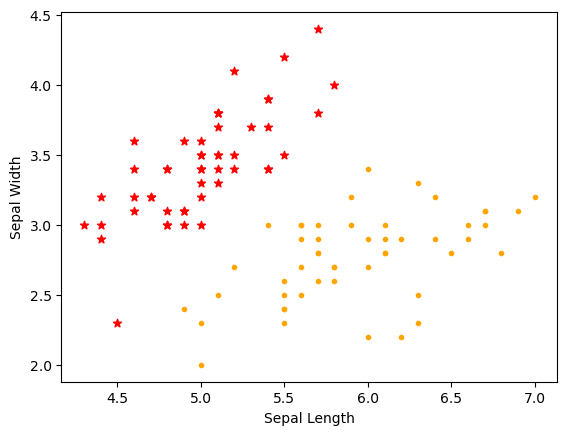

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'], color='red', marker='*')
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'], color='orange', marker='.')
plt.show()

### Training Data

using train_test_split function , we are spitting the data to apply knn on them more effectively

In [14]:
X1 = data.drop(['target'], axis='columns')
Y1 = data.target
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=1)

len(x_train)
len(x_test)


30

### Creating a KNN classifier

in addition to showcasing the accuracy score with k value being 10

In [15]:
# minkowski is euclidean distance
knn = kncls(n_neighbors=10) # arguement is the K value
knn.fit(x_train, y_train)

"Test with k=10: ", knn.score(x_test, y_test)

('Test with k=10: ', 0.9666666666666667)

### Predicting Data 

we have incorporated a confusion matrix which helps us generate the performance measures that evaluate the performance of a classification model, knn in this case

In [16]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)       # diagonals correct prediction, not on diagonal is wrong prediction

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### Final model Evaluation

using classification report, we can conclude key takeaways from our model we have created

In [17]:
# sum of all values wil equate to sample data , here it is 30

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

